In [5]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean as euc
import numpy as np
import pandas as pd
# np.random.seed(0)

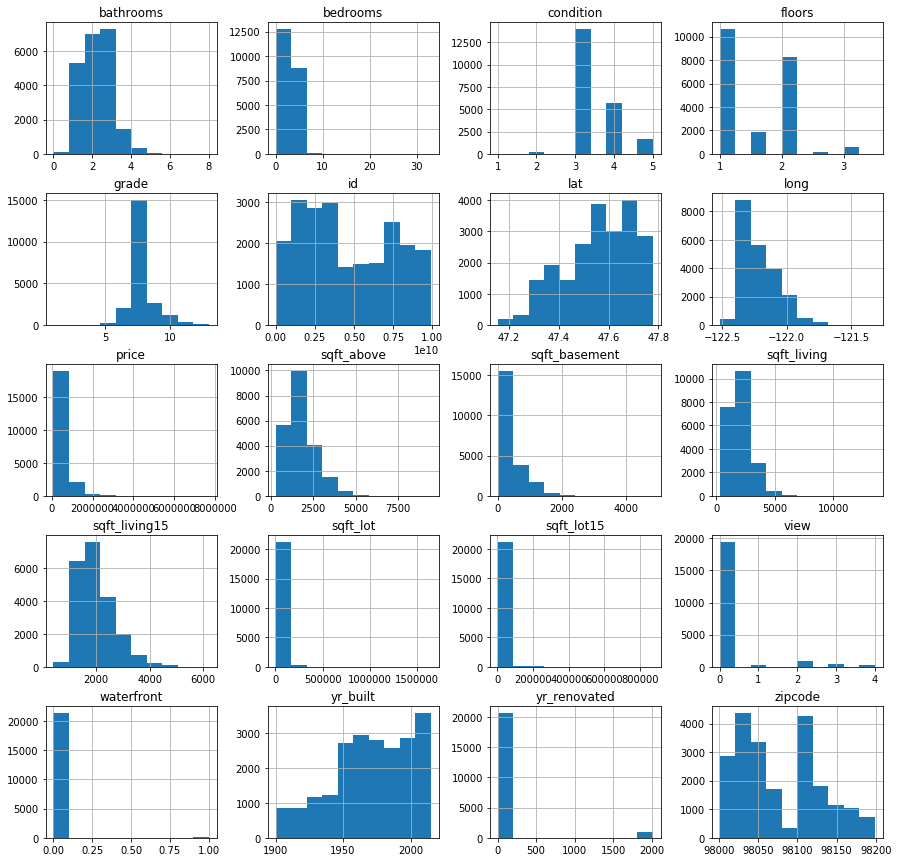

In [10]:
house_data = pd.read_csv('C:/Users/hp/Downloads/house.csv', na_values='Nothing')
X = house_data.drop('price' , 1).values # drop target variable
y1 = house_data['price'].values
pd.DataFrame.hist(house_data, figsize = [15,15]);

In [35]:
class KNN(object):
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test, k=3):
        
        predictions = np.zeros(X_test.shape[0])
        
        for i, point in enumerate(X_test):
            distances = self._get_distances(point)
            k_nearest = self._get_k_nearest(distances, k)
            prediction = self._get_predicted_value(k_nearest)
            predictions[i] = prediction
            
        return predictions
    
    #helper functions
    def _get_distances(self, x):
        '''Take an single point and return an array of distances to every point in our dataset'''
        distances = np.zeros(self.X_train.shape[0])
        for i, point in enumerate(self.X_train):
            distances[i] = euc(x, point)
        return distances
    def _get_k_nearest(self, distances, k):
        '''Take in the an array of distances and return the indices of the k nearest points'''
        nearest = np.argsort(distances)[:k]
        return nearest
    
    def _get_predicted_value(self, k_nearest):
        '''Takes in the indices of the k nearest points and returns the mean of their target values'''
        return np.mean(self.y_train[k_nearest])
    

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
bottom_10 = np.percentile(house_data['price'], 10)
top_10 = np.percentile(house_data['price'], 90)

house_data = house_data[(house_data['price'] > bottom_10) & (house_data['price'] < top_10)]

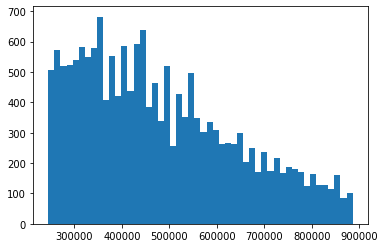

In [13]:
fig, ax = plt.subplots()
ax.hist(house_data['price'], bins=50);

In [36]:
features = ['sqft_living', 'lat', 'long']

X = house_data[features]
y = house_data['price'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [39]:
knn = KNN()
knn.fit(X_train_scaled, y_train)

In [40]:
#This will run for a long time
preds = knn.predict(X_test_scaled, k=3)

In [41]:
X_test_scaled.shape

(4320, 3)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
nn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

nn.fit(X_train_scaled, y_train)

sk_preds = nn.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, sk_preds))

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 82615.18459223428


In [45]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_train_scaled, y_train)
    preds = nn.predict(X_test_scaled)
    
    test_errors[i] = np.sqrt(mean_squared_error(y_test, preds))

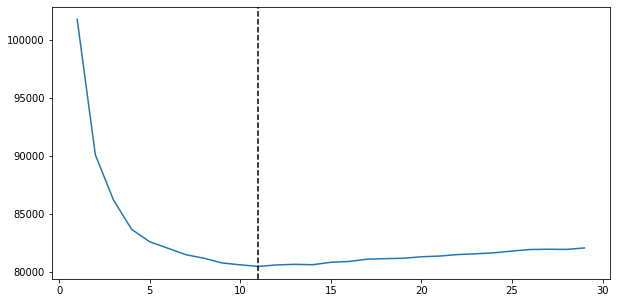

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [47]:
optimal_k = list(ks)[np.argmin(test_errors)]

optimal_error = np.min(test_errors)

print(f'Optimal number of Neighbors: {optimal_k} Root Mean Squared Error: {optimal_error}')

Optimal number of Neighbors: 11 Root Mean Squared Error: 80482.33342339161
